In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carga datos de dataset
Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
tras observar los datos del día de hoy, el objetivo es predecir las variables target:

-RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.

-RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.

In [ ]:
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

### Sólo queremos predecir la lluvia de las siguientes localidades:
df = df[(df["Location"] == "Sydney") | (df["Location"] == "SydneyAirport") | (df["Location"] == "Canberra") \
  | (df["Location"] == "Melbourne") | (df["Location"] == "MelbourneAirport")]

### Como se considerarán todas las ciudades como una misma, la columna location no será de interés
df = df.drop(columns=["Location"])

# Análisis exploratorio y selección de características

## Visualización de los datos

In [ ]:
df.head()

,Unnamed: 0,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,30176,2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,30177,2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,30178,2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,30179,2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,30180,2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


Columnas: Veamos qué tipos de datos posee cada una, y la cantidad de datos nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 30167 to 70370
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15986 non-null  int64  
 1   Date              15986 non-null  object 
 2   MinTemp           15495 non-null  float64
 3   MaxTemp           15500 non-null  float64
 4   Rainfall          15199 non-null  float64
 5   Evaporation       14280 non-null  float64
 6   Sunshine          14038 non-null  float64
 7   WindGustDir       14529 non-null  object 
 8   WindGustSpeed     14531 non-null  float64
 9   WindDir9am        15291 non-null  object 
 10  WindDir3pm        15696 non-null  object 
 11  WindSpeed9am      15725 non-null  float64
 12  WindSpeed3pm      15737 non-null  float64
 13  Humidity9am       15416 non-null  float64
 14  Humidity3pm       15461 non-null  float64
 15  Pressure9am       15251 non-null  float64
 16  Pressure3pm       15260 non-null  fl

In [ ]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15986.000000,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,49512.619855,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,15172.399796,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,30176.000000,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,34173.250000,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,47228.500000,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,66393.750000,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,70391.000000,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


Veamos con cuántos datos contamos en nuestra base de datos.

In [ ]:
df.shape

(15986, 24)

## Gráficos univariados

Graficamos las diferentes variables del dataframe, para dar un primer pantallazo de nuestro datos, y a su vez, chequeamos el balanceo de las variables.

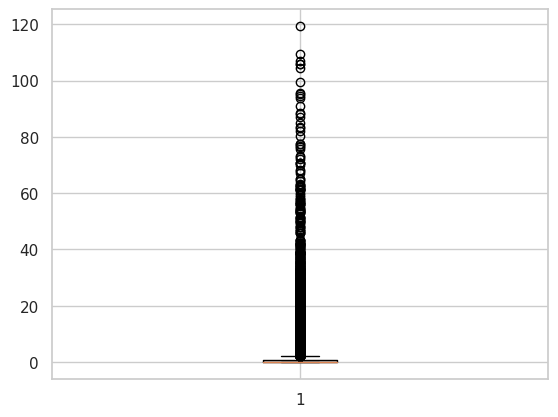

In [ ]:
plt.boxplot(df.dropna(subset=['Rainfall'])['Rainfall'])
plt.show()

Ahora bien, vemos que existen ciertos datos con valores extremos que pueden afectar negativamente la creación del modelo en el futuro. Por esto, en vez de eliminarlos los reducimos para que no tengan un peso desproporcionado.

In [ ]:
#df.loc[df['Rainfall'] > 60, 'Rainfall'] = 60
#df.loc[df['RainfallTomorrow'] > 60, 'RainfallTomorrow'] = 60

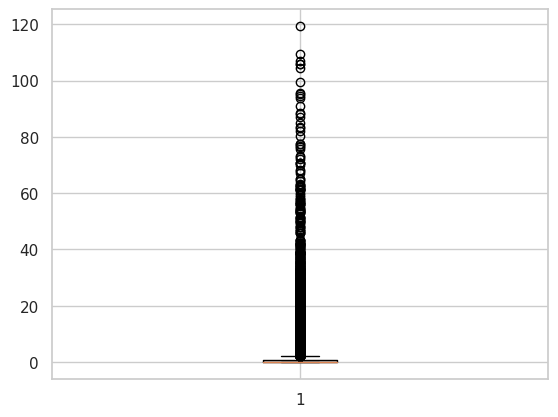

In [ ]:
plt.boxplot(df.dropna(subset=['Rainfall'])['Rainfall'])
plt.show()

### Velocidad del Viento

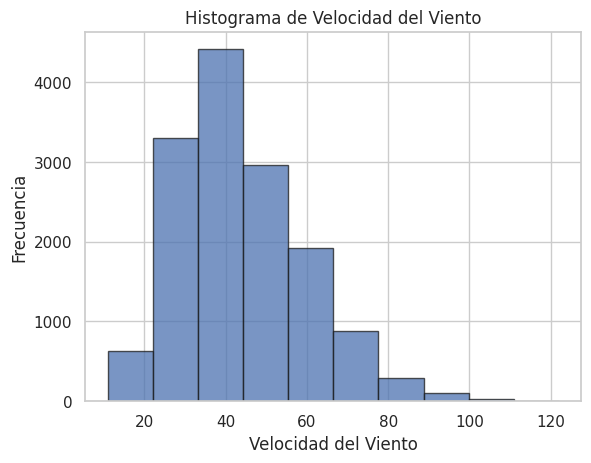

In [ ]:
plt.hist(df['WindGustSpeed'], bins=10, edgecolor='k', alpha=0.75)
plt.xlabel('Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Velocidad del Viento')
plt.show()

### Nubes

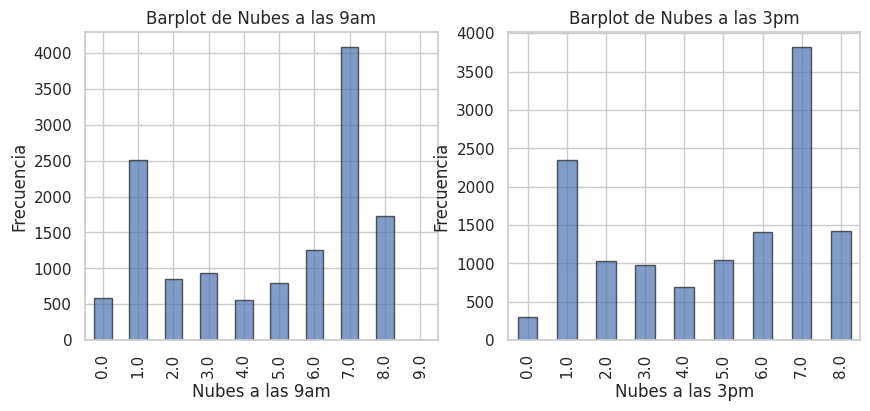

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Cloud9am'].value_counts().sort_index().plot(kind="bar", ax=axes[0], edgecolor='k', alpha=0.7)
axes[0].set_xlabel('Nubes a las 9am')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Barplot de Nubes a las 9am')

df['Cloud3pm'].value_counts().sort_index().plot(kind="bar", ax=axes[1], edgecolor='k', alpha=0.7)
axes[1].set_xlabel('Nubes a las 3pm')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Barplot de Nubes a las 3pm')

plt.show()


### Presión

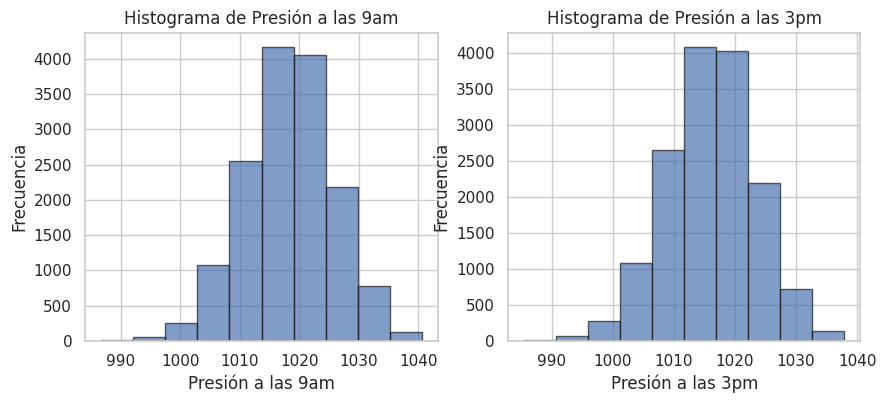

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Pressure9am'].plot.hist(ax=axes[0], bins=10, edgecolor='k', alpha=0.7)
axes[0].set_xlabel('Presión a las 9am')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Presión a las 9am')

df['Pressure3pm'].plot.hist(ax=axes[1], bins=10, edgecolor='k', alpha=0.7)
axes[1].set_xlabel('Presión a las 3pm')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de Presión a las 3pm')

plt.show()

### Temperatura mínima y máxima

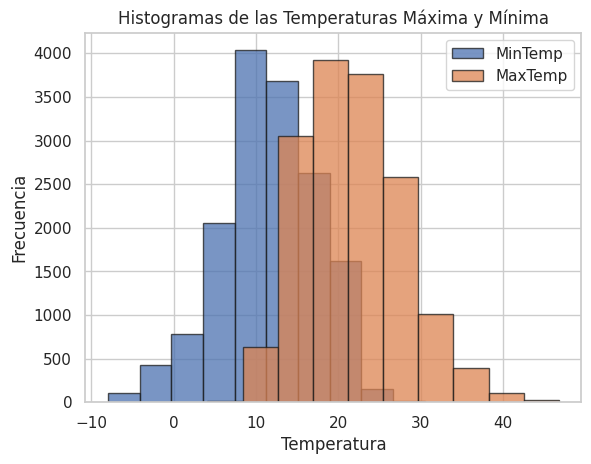

In [ ]:
plt.hist(df['MinTemp'], bins=10, edgecolor='k', alpha=0.75, label='MinTemp')
plt.hist(df['MaxTemp'], bins=10, edgecolor='k', alpha=0.75, label='MaxTemp')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.title('Histogramas de las Temperaturas Máxima y Mínima')
plt.legend()
plt.show()

## Gráficos bivariados

Veamos cómo afecta la presencia de nubes a la probabilidad de lluvia al día siguiente.

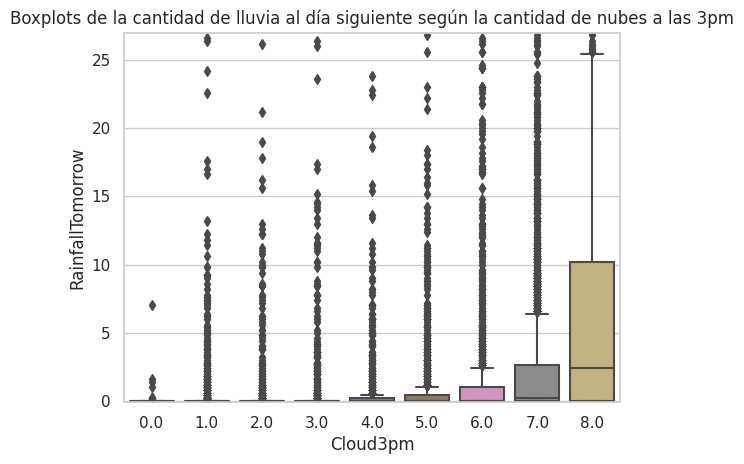

In [ ]:
sns.set(style="whitegrid")

plt.ylim(-0.1, 27)

sns.boxplot(x='Cloud3pm', y='RainfallTomorrow', data=df)
plt.title('Boxplots de la cantidad de lluvia al día siguiente según la cantidad de nubes a las 3pm')
plt.show()

## Limpieza de los datos

Cantidad de valores faltantes.

In [ ]:
df.isna().sum()

Unnamed: 0             0
Date                   0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

Veamos qué ocurre si eliminamos todos


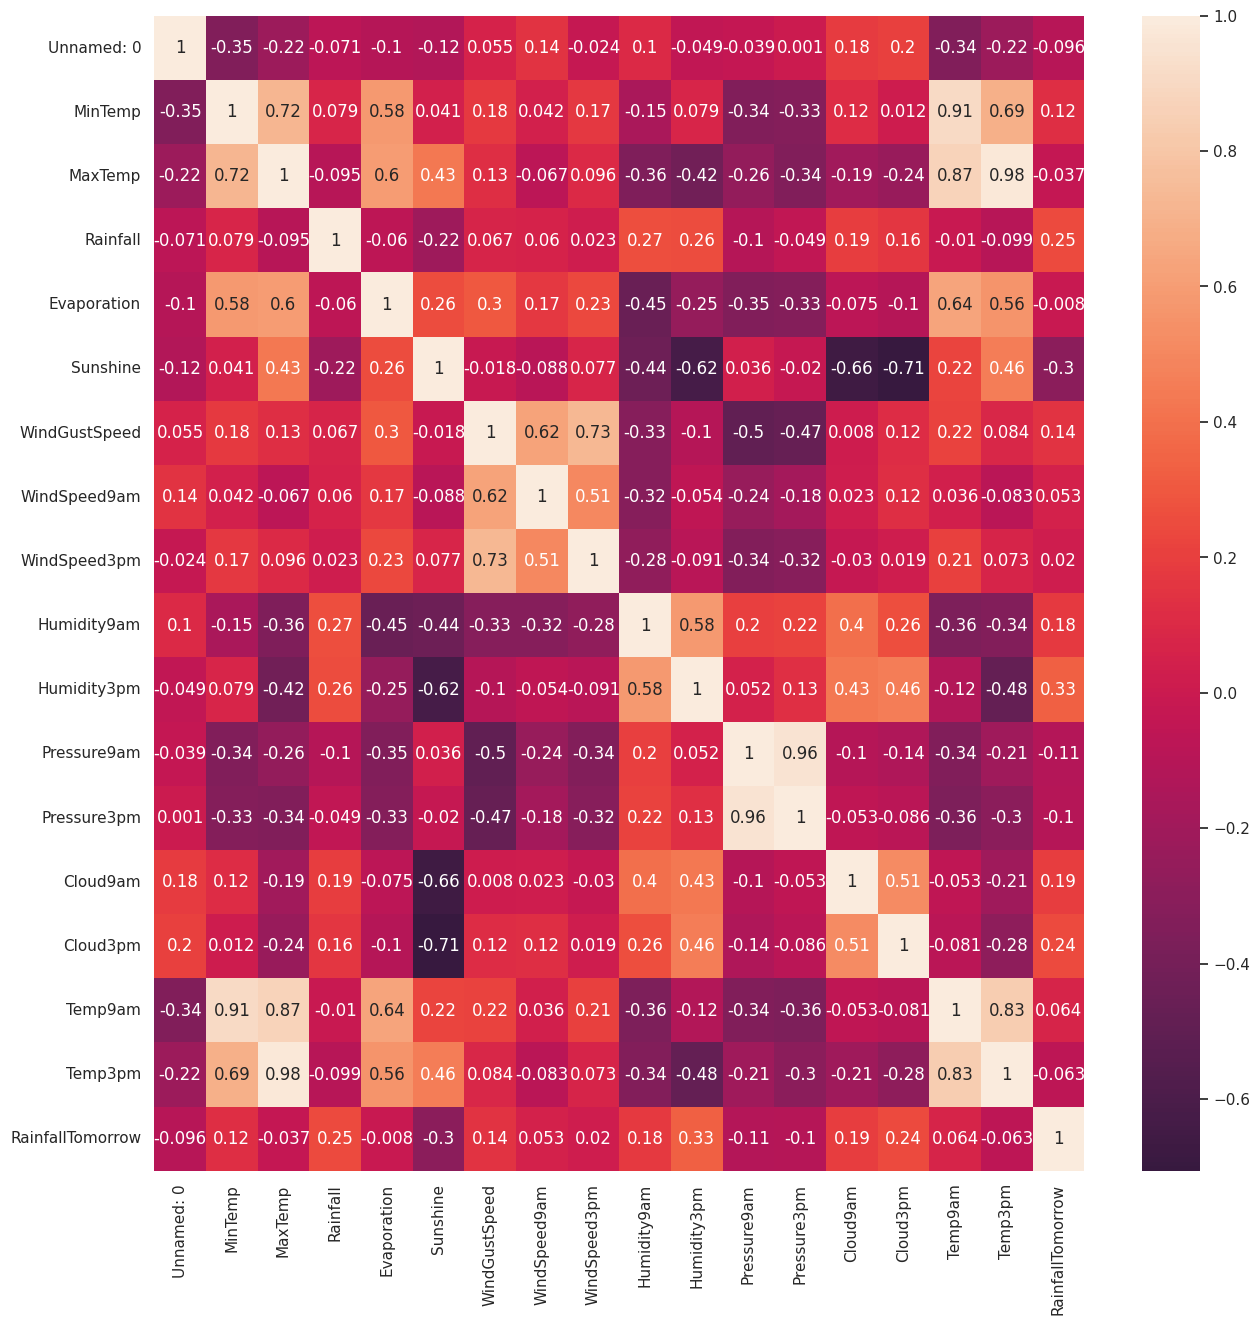

In [ ]:
df2 = df.dropna()

# Matriz de correlaciones
corr = df2.select_dtypes(include=['number']).corr(method='pearson').round(3)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

Observando la matriz de correlación podemos notar que existen ciertas variables que están altamente relacionadas.

Por ejemplo, MaxTemp y Temp3pm, y MinTemp y Temp9am. Entonces, podemos simplificar los datos eliminando las columnas Temp 3pm y Temp9am.

Por otro lado, la Pressure9am y Pressure3pm también tienen una alta correlación, y por lo tanto, haciendo otra observación de la matriz de correlación, notamos que Pressure9am tiene una correlación levemente mayor que Pressure3pm con RainfallTomorrow, y entonces, consideraremos Pressure3pm como un dato redundante.

De la misma forma, llegamos a la conclusión de eliminar WindSpeed3pm.

In [ ]:
df = df.drop(columns=["Pressure3pm", "Temp3pm", "Temp9am", "WindSpeed3pm"])

Consideramos la entrada de RainToday, RainTomorrow y RainfallTomorrow como datos esenciales para el modelo. Por lo tanto, considerando también la baja proporción de datos faltantes para estas columnas, decidimos eliminar cualquier entrada que no contenga estos datos.

In [ ]:
df = df.dropna(subset=['RainToday', 'RainTomorrow', 'RainfallTomorrow'])

Por otro lado, existe una columna de nombre "Unnamed: 0", que además de no tener un significado claro, no parece tener mucha correlación con las variables que queremos predecir.

In [ ]:
df = df.drop(columns=["Unnamed: 0"])

Luego de analizar las relaciones de las variables, verificando cuál es el nivel de correlación de múltiples variables con RainfallTomorrow, e intentamos buscar relaciones adicionales. De esta indagación en el dataset, pudimos encontrar que la variación en un día entre la humedad a las 9 am y 3pm es un buen predictor para la cantidad de lluvia en el día próximo.

In [ ]:
df["HumidityChange"] = (df["Humidity3pm"] - df["Humidity9am"])

## Codificacion de variables y Balance de datos

#### Codificamos RainToday y RainTomorrow

In [ ]:
code_lluvia = {"Yes":1, "No":0}

df['RainToday'] = df["RainToday"].replace(code_lluvia)
df['RainTomorrow'] = df["RainTomorrow"].replace(code_lluvia)

Veamos si existe algún desbalanceo en los datos:

### Balanceo y formatteo de fechas

Balanceo de los años

<Axes: >

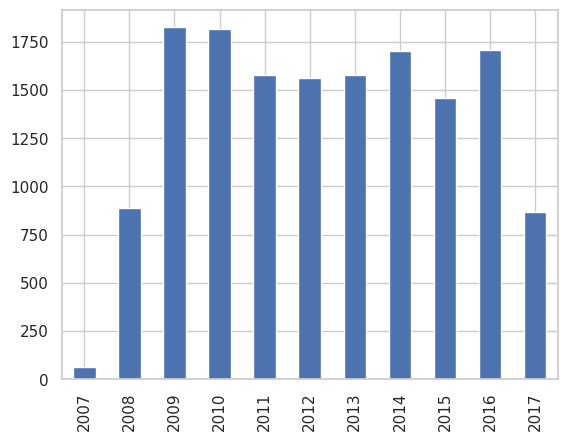

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
nbins = len(df["Year"].unique())
df['Year'].value_counts().sort_index().plot(kind="bar")


Text(0.5, 1.0, 'Suma de RainfallTomorrow por Año')

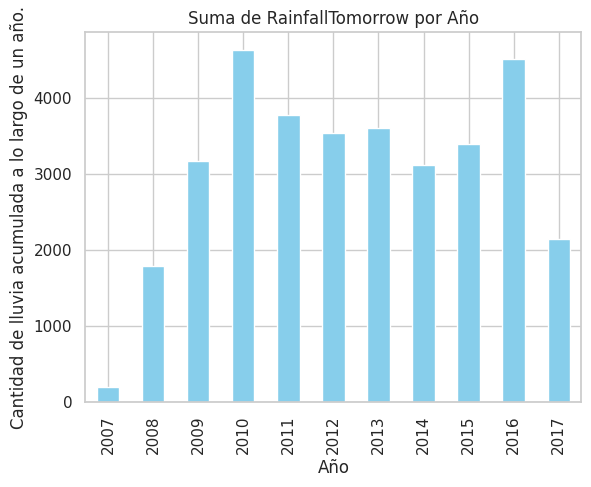

In [ ]:
sum_by_year = df.groupby('Year')['RainfallTomorrow'].sum()

sum_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de lluvia acumulada a lo largo de un año.')
plt.title('Suma de RainfallTomorrow por Año')

Se puede observar que la variable Year no tiene una relevancia mayor en la cantidad de lluvia, ya que se puede ver que el barplot es muy similar al anteriomente visto, lo cual nos dice que la cantidad de lluvia en un año depende realmente casi exclusivamente de la cantidad de datos que tengamos del mismo.

Por lo tanto, no consideramos esta variable de relevancia y se la omitirá.

In [ ]:
df = df.drop(columns=["Year"])

Balanceo de los meses

<Axes: >

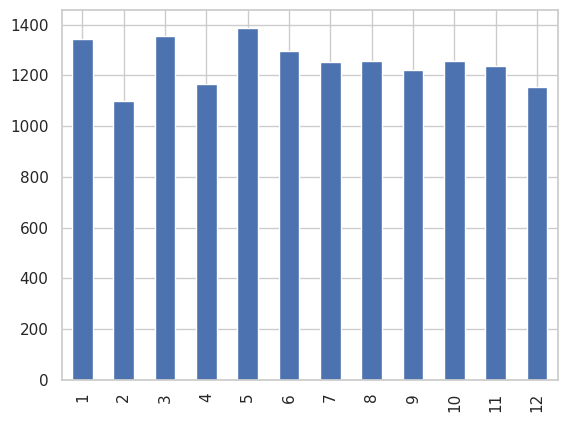

In [ ]:
df['Month'].value_counts().sort_index().plot(kind="bar")

Observamos que existe un buen balanceo de los años y los meses.

Ahora, podemos finalmente codificar fecha

In [ ]:
code_mesesX = {
    1: np.cos(np.pi/4),
    2: np.cos(np.pi/4),
    3: np.cos(3*np.pi/4),
    4: np.cos(3*np.pi/4),
    5: np.cos(3*np.pi/4),
    6: np.cos(5*np.pi/4),
    7: np.cos(5*np.pi/4),
    8: np.cos(5*np.pi/4),
    9: np.cos(7*np.pi/4),
    10: np.cos(7*np.pi/4),
    11: np.cos(7*np.pi/4),
    12: np.cos(np.pi/4)
}
code_mesesY = {
    1: np.sin(np.pi/4),
    2: np.sin(np.pi/4),
    3: np.sin(3*np.pi/4),
    4: np.sin(3*np.pi/4),
    5: np.sin(3*np.pi/4),
    6: np.sin(5*np.pi/4),
    7: np.sin(5*np.pi/4),
    8: np.sin(5*np.pi/4),
    9: np.sin(7*np.pi/4),
    10: np.sin(7*np.pi/4),
    11: np.sin(7*np.pi/4),
    12: np.sin(np.pi/4)
}
df['SeasonX'] = df["Date"].dt.month.replace(code_mesesX)
df['SeasonY'] = df["Date"].dt.month.replace(code_mesesY)
df = df.drop(columns='Date')

### Balanceo y formatteo de la dirección del viento

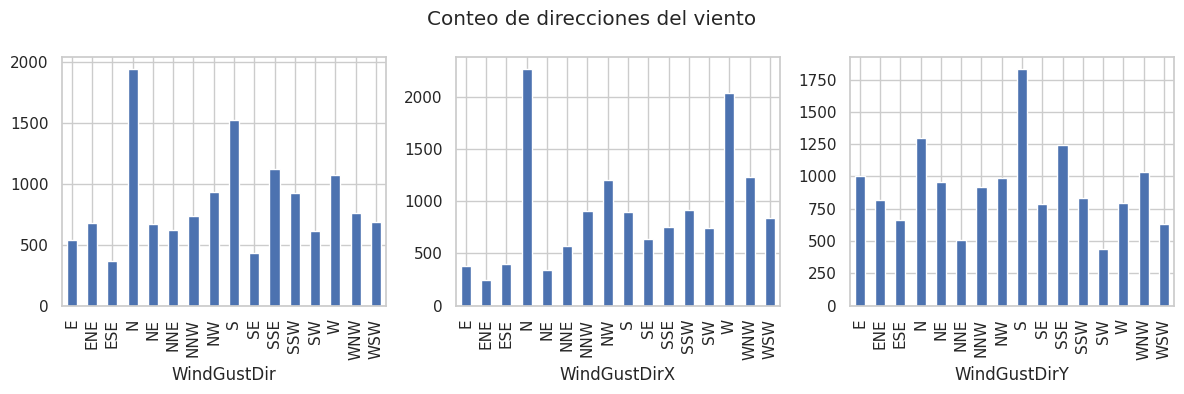

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila y 3 columnas para los gráficos

df['WindGustDir'].value_counts().sort_index().plot(kind="bar", ax=axes[0])
df['WindDir9am'].value_counts().sort_index().plot(kind="bar", ax=axes[1])
df['WindDir3pm'].value_counts().sort_index().plot(kind="bar", ax=axes[2])

axes[0].set_xlabel('WindGustDir')
axes[1].set_xlabel('WindGustDirX')
axes[2].set_xlabel('WindGustDirY')
fig.suptitle('Conteo de direcciones del viento')

plt.tight_layout()
plt.show()

#### Codificamos la dirección del viento


Ahora que pudimos observar que la dirección del viento está relativamente balanceada, creamos una nueva representacion numérica del viento, y dos columnas para esta nueva representación.

In [ ]:
WindDirToXDir = {
    'N': 0,
    'S': 0,
    'E': 1,
    'W': -1,
    'NW': 2**0.5,
    'NE': -2**0.5,
    'SE': 2**0.5,
    'SW': -2**0.5,
    'NNW': np.cos(5*np.pi/8),
    'NNE': np.cos(3*np.pi/8),
    'ENE': np.cos(1*np.pi/8),
    'WNW': np.cos(7*np.pi/8),
    'ESE': np.cos(-1*np.pi/8),
    'SSE': np.cos(-3*np.pi/8),
    'SSW': np.cos(-5*np.pi/8),
    'WSW': np.cos(-7*np.pi/8)
}
WindDirToYDir = {
    'N': 1,
    'S': -1,
    'E': 0,
    'W': 0,
    'NW': 2**0.5,
    'NE': 2**0.5,
    'SE': -2**0.5,
    'SW': -2**0.5,
    'NNW': np.sin(3*np.pi/8),
    'NNE': np.sin(3*np.pi/8),
    'ENE': np.sin(1*np.pi/8),
    'WNW': np.sin(1*np.pi/8),
    'ESE': np.sin(-1*np.pi/8),
    'SSE': np.sin(-3*np.pi/8),
    'SSW': np.sin(-3*np.pi/8),
    'WSW': np.sin(-1*np.pi/8)
}

df['WindDir3pmX'] = df['WindDir3pm'].replace(WindDirToXDir)
df['WindDir3pmY'] = df['WindDir3pm'].replace(WindDirToYDir)

df['WindDir9amX'] = df['WindDir9am'].replace(WindDirToXDir)
df['WindDir9amY'] = df['WindDir9am'].replace(WindDirToYDir)

df['WindGustDirX'] = df['WindGustDir'].replace(WindDirToXDir)

df['WindGustDirY'] = df['WindGustDir'].replace(WindDirToYDir)
### La columna original deja de ser de interés
df = df.drop(columns=['WindDir3pm', 'WindDir9am', 'WindGustDir'])

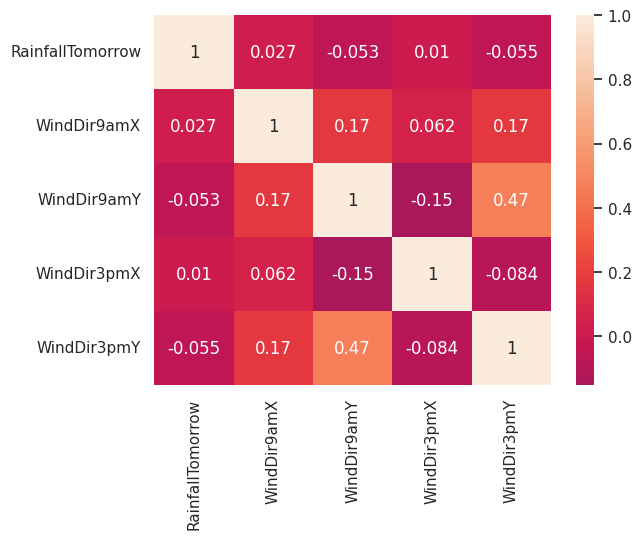

In [ ]:
df2 = df[["RainfallTomorrow", "WindDir9amX", "WindDir9amY", "WindDir3pmX", "WindDir3pmY"]].copy()
corr = df2.corr(method='pearson').round(3)
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

Luego, vemos que la dirección del viento a las 9am y las 3pm no necesariamente son buenas para predecir a la otra, por lo que ambas pueden llegar a ser de utilidad, y no eliminamos ninguna.

## Rellenado de datos faltantes

Existe una gran cantidad de datos faltantes, por lo que, ahora que podemos tenemos únicamente variables cuantitativas, reemplazamos los valores nulos por el promedio.

In [ ]:
for columna in df.drop(columns=['RainfallTomorrow']).select_dtypes(include=['number']).columns:
  promedio_col = df[columna].mean()
  df[columna].fillna(promedio_col, inplace=True)

#Comprobamos los resultados
df.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Cloud9am            0
Cloud3pm            0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
HumidityChange      0
Month               0
SeasonX             0
SeasonY             0
WindDir3pmX         0
WindDir3pmY         0
WindDir9amX         0
WindDir9amY         0
WindGustDirX        0
WindGustDirY        0
dtype: int64

Vemos que las relaciones no fueron afectadas de manera significativa por la limpieza, por lo que nos damos por satisfechos

# Linear Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.metrics import mean_absolute_error


Dada esta matriz de correlación, decidimos utilizar las 5 variables con mayor correlación en
valor absoluto:
- Humidity3pm,
- Sunshine,
- Rainfall,
- Cloud3pm,
- HumidityChange,

las estaciones, y luego 2 escogidas aleatoriamente

In [ ]:
import random

#variables_aleatorias = random.sample(list(df.drop(columns=["Rainfall", "Humidity3pm", "Sunshine", "Cloud3pm", "HumidityChange", "RainfallTomorrow", "RainTomorrow", "SeasonX", "SeasonY"]).columns), k = 2)
#variables_prediccion = variables_aleatorias + ["Rainfall", "Humidity3pm", "Sunshine", "Cloud3pm", "HumidityChange", "SeasonX", "SeasonY"]
variables_prediccion = list(df.drop(columns=["RainfallTomorrow", "RainTomorrow"]).columns)

El error rmse de test es: 6.279834506510542
El R2 es:  0.2581
El error mae de test es:  3.1605


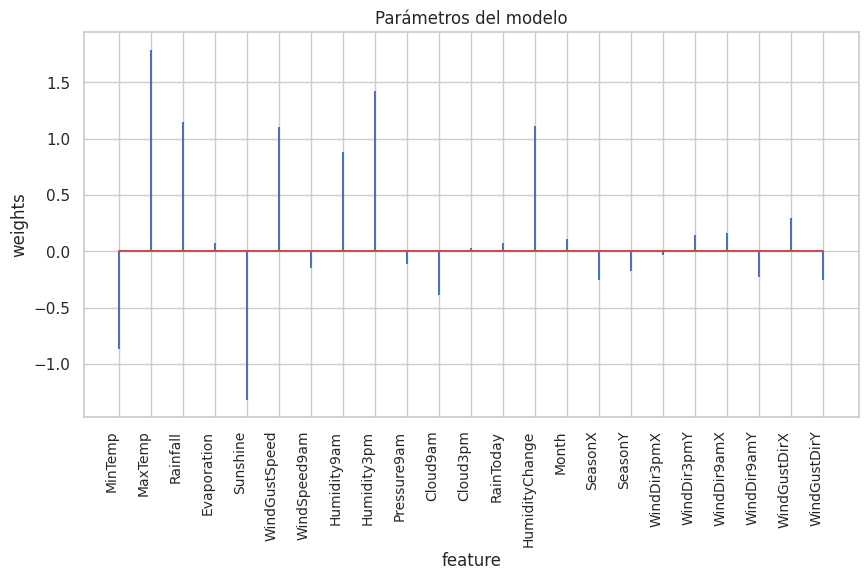

In [ ]:
model = make_pipeline(StandardScaler(), LinearRegression())


X = df[variables_prediccion]
y = df['RainfallTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2, random_state = 5)

model.fit(X_train, y_train)

# Coeficientes del modelo
df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
#plt.show()

y_pred = model.predict(X_test)
y_pred.shape, y_test.shape

# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir
rmse_ols = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols}")

R2 = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2.round(4))

mae = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae.round(4))

## Ridge

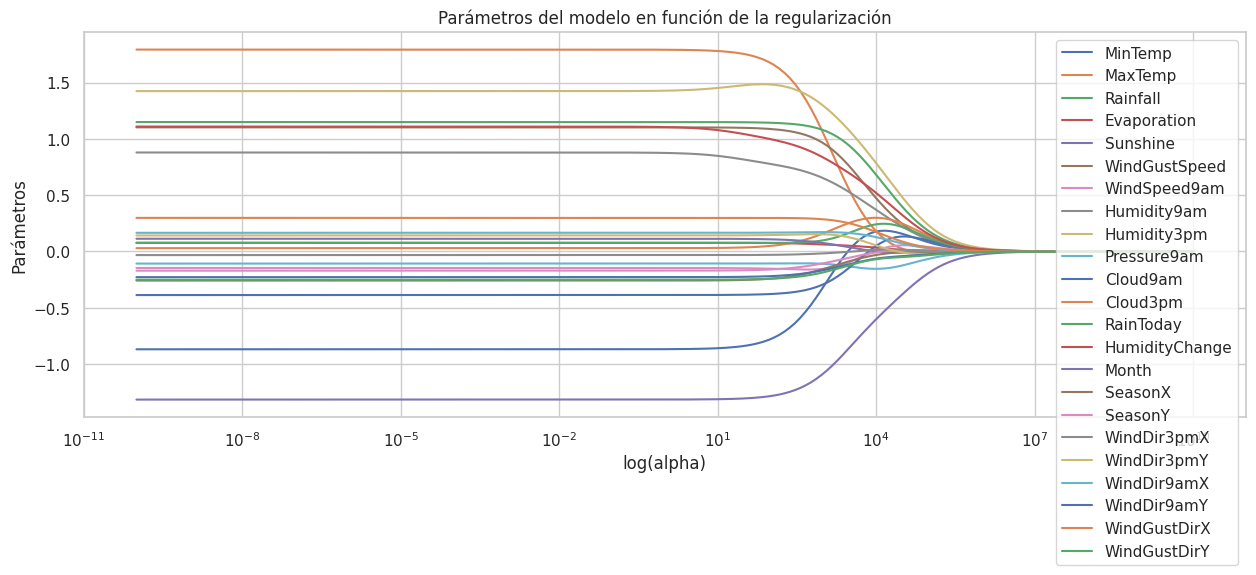

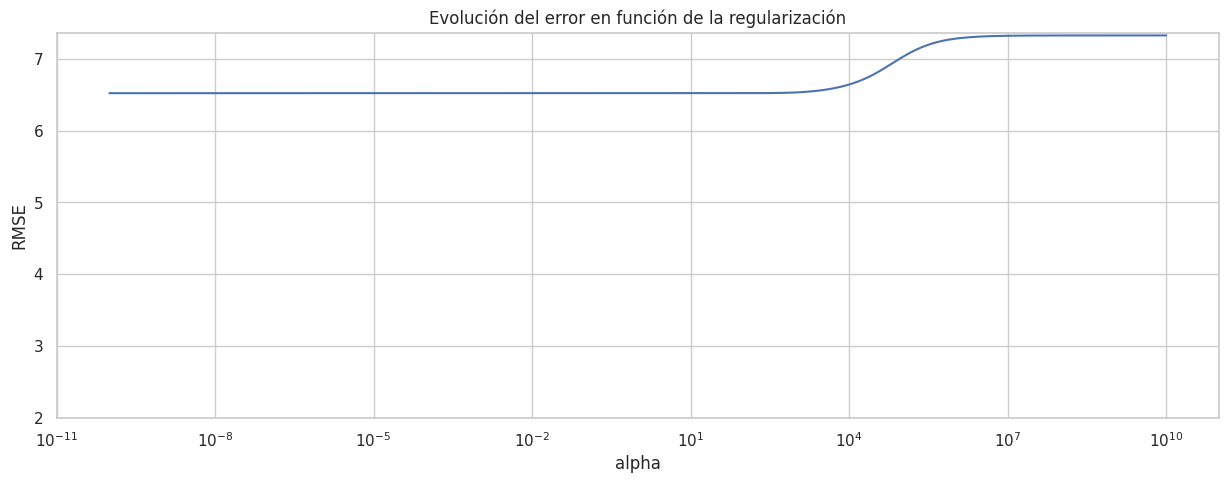

El error rmse de test es: 6.280301873237841
El R2 es:  0.258
El error mae de test es:  3.1542


In [ ]:
modeloRidge = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

modeloRidge.fit(X_train, y_train)
# Evolución de los parámetros en función de alpha

alphas = modeloRidge.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()


# Evolución del error de validación cruzada en función de alpha
# modelo.cv_values almacena el MSE de CV para cada valor de alpha.
modRidge = modeloRidge.steps[1][1]

mse_cv = modRidge.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = modRidge.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(modRidge.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()


y_pred = modeloRidge.predict(X_test)

# Error de test del modelo
rmse_ridge = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

rmse_ols = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols}")

R2 = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2.round(4))

mae = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae.round(4))

## Lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.302e+01, tolerance: 6.455e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e+02, tolerance: 6.455e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.

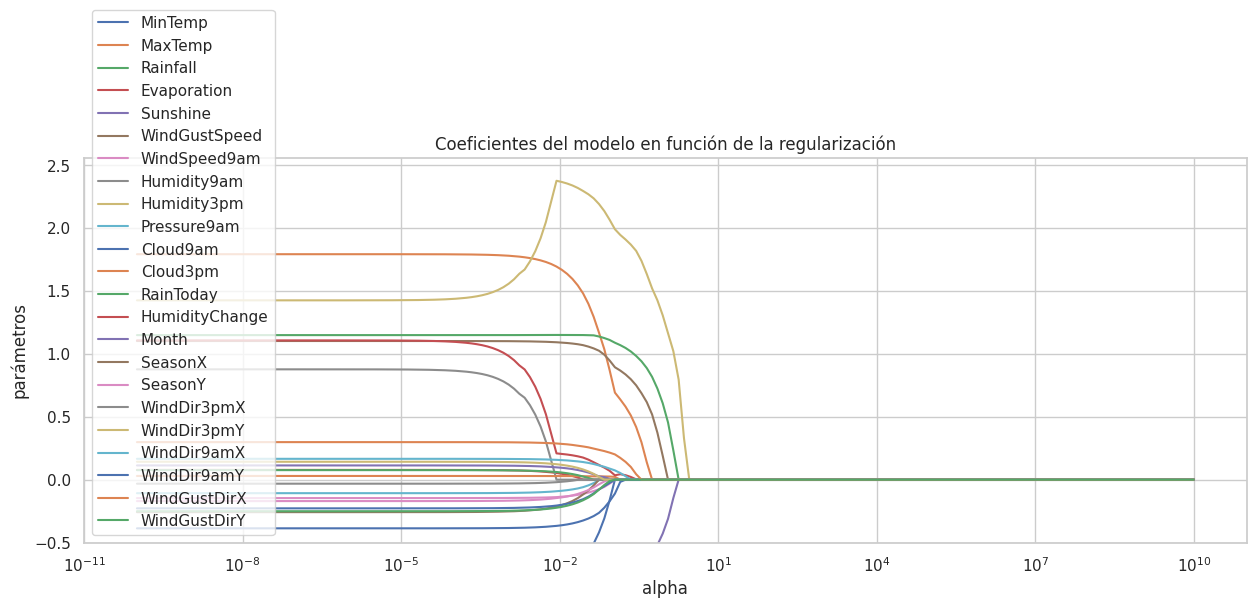

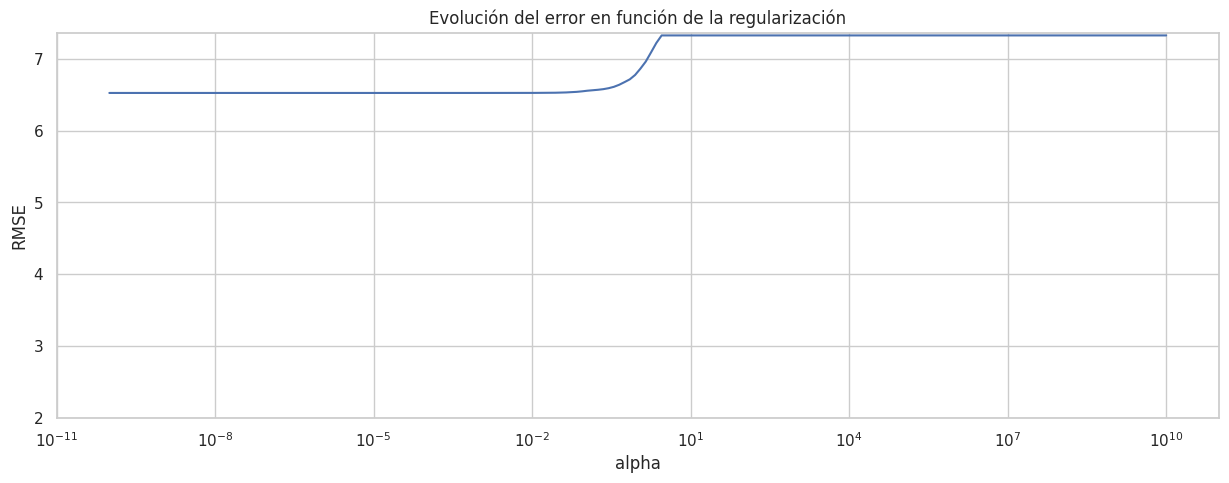

El error (rmse) de test es: 6.279859709543119


0.2581

In [ ]:
modeloLasso = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

modeloLasso.fit(X_train, y_train)

# Evolución de los parámetros en función de alpha
modLasso = modeloLasso.steps[1][1]

alphas = modLasso.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()


# Evolución del error de validación cruzada en función de alpha
# modelo.mse_path almacena el MSE de CV para cada valor de alpha.
mse_cv = modLasso.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = modLasso.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(modLasso.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

y_pred = modeloLasso.predict(X_test)
rmse_Lasso = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_Lasso}")
R2 = metrics.r2_score(y_test, y_pred)
R2.round(4)

## ElasticNet

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.5905686065671, tolerance: 61.20893091695157
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.95141028263606, tolerance: 61.20893091695157
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did n

Mejor valor de alpha encontrado: 0.005478901179593945
Mejor valor de l1_ratio encontrado: 0.01

El error (rmse) de test es: 6.280387454849223


0.2579

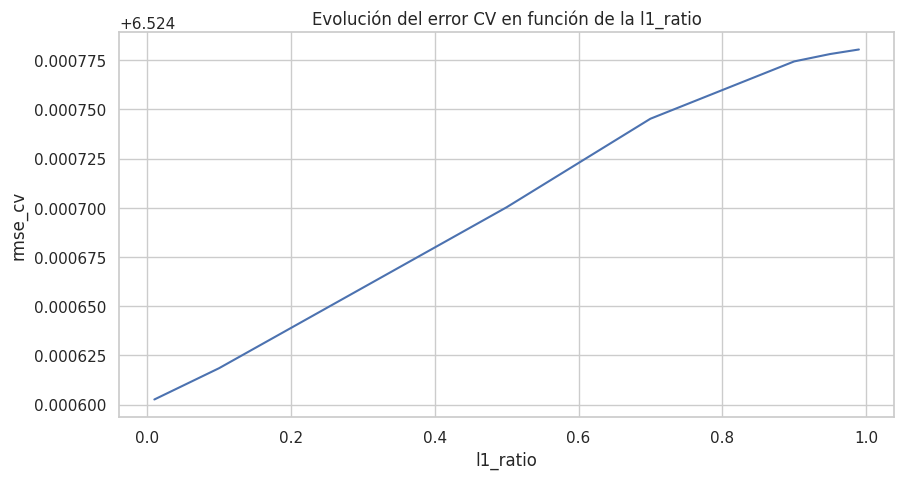

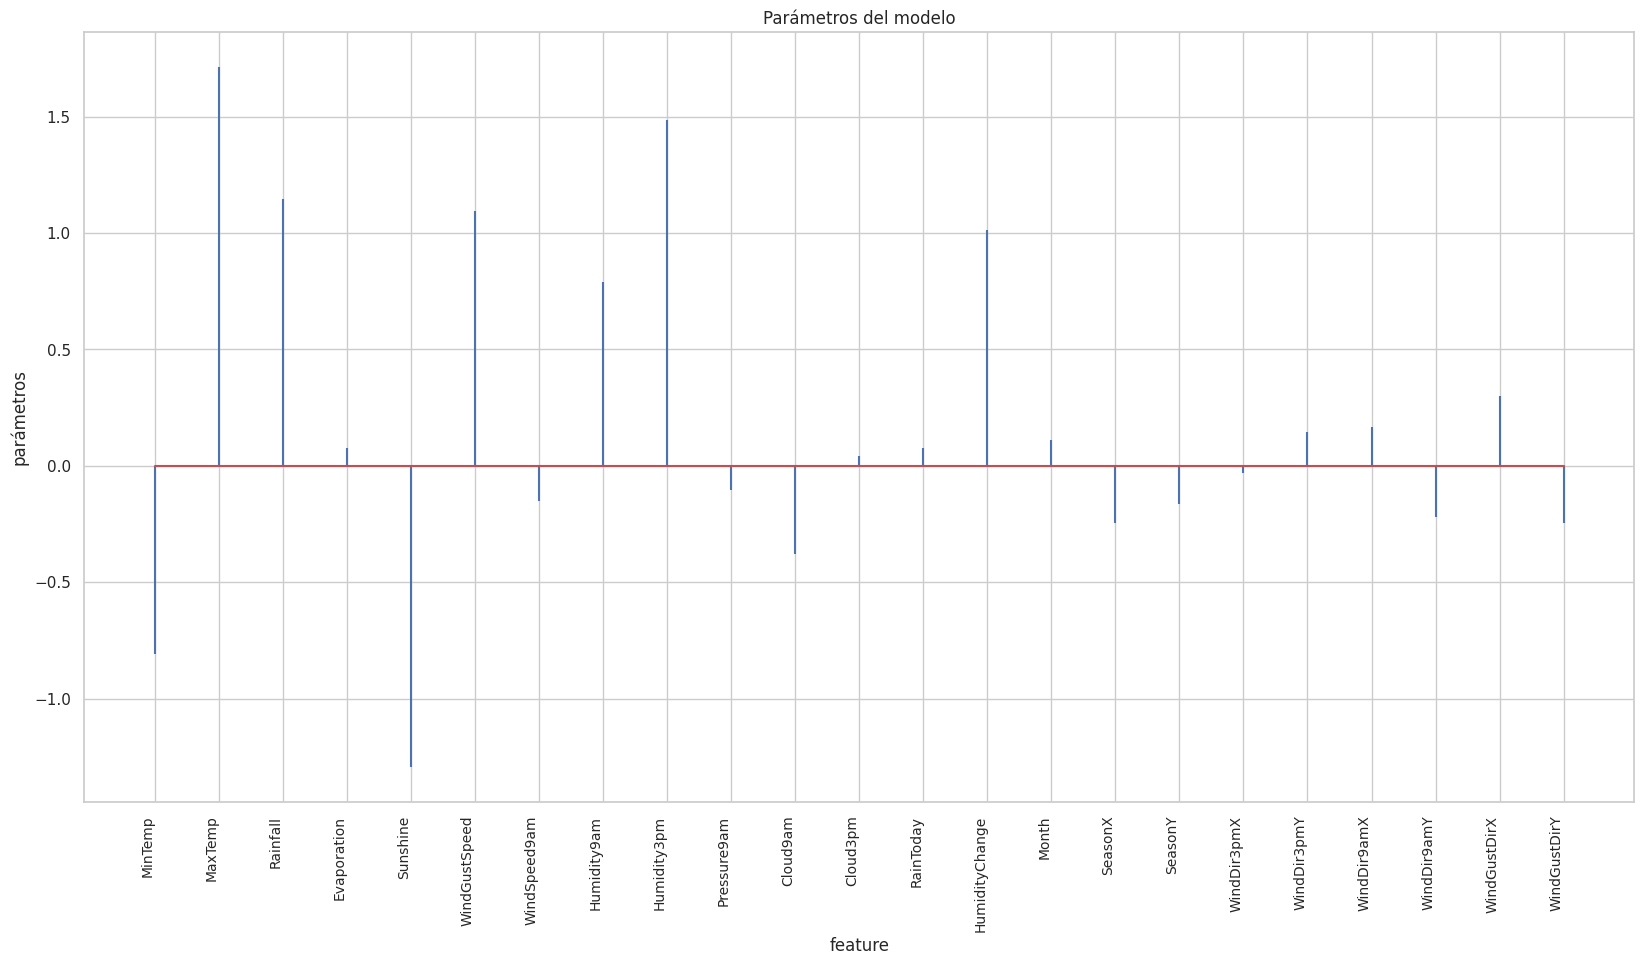

In [ ]:
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                              #max_iter        = 10000,
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv')

# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod.l1_ratio_}")

# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo')

# Predicciones test
y_pred = modelo.predict(X_test)

# Error de test del modelo
rmse_elastic = mean_squared_error(y_test,y_pred, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")

R2 = metrics.r2_score(y_test, y_pred)
R2.round(4)

## Gradiente descendiente

### Definimos las funciones

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

### Gradiente Descendiente

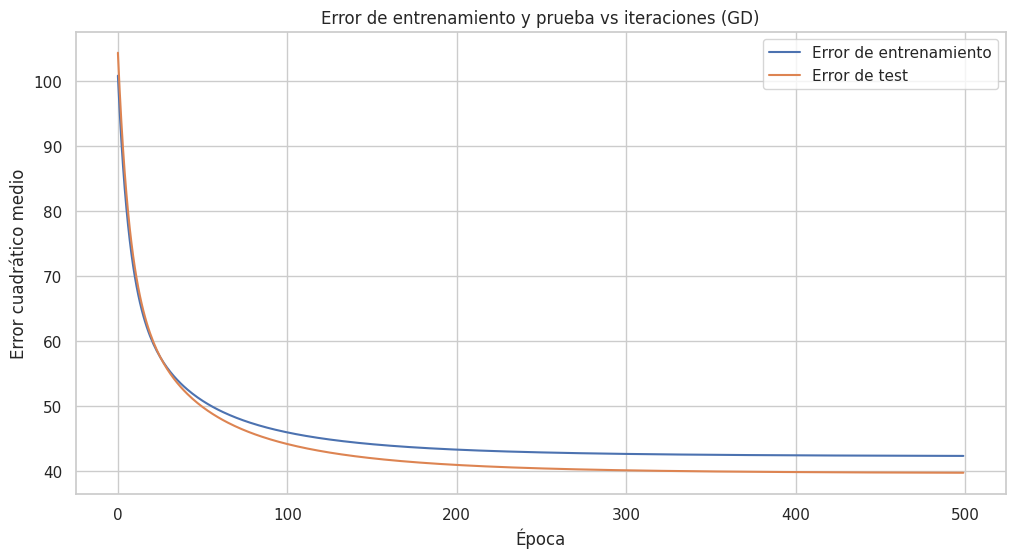

array([[ 2.22558588],
       [-0.35187086],
       [ 1.18468392],
       [ 1.16852521],
       [ 0.09745727],
       [-1.09705098],
       [ 1.04434218],
       [-0.1907727 ],
       [ 0.19572377],
       [ 1.98585464],
       [-0.10917179],
       [-0.34992813],
       [ 0.16805375],
       [ 0.04203461],
       [ 0.35016234],
       [ 0.11634495],
       [-0.2521666 ],
       [-0.14979302],
       [-0.03324459],
       [ 0.22614545],
       [ 0.18265225],
       [-0.1996521 ],
       [ 0.32094546],
       [-0.25734461]])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=500)

### Gradiente Descendiente Estocástico

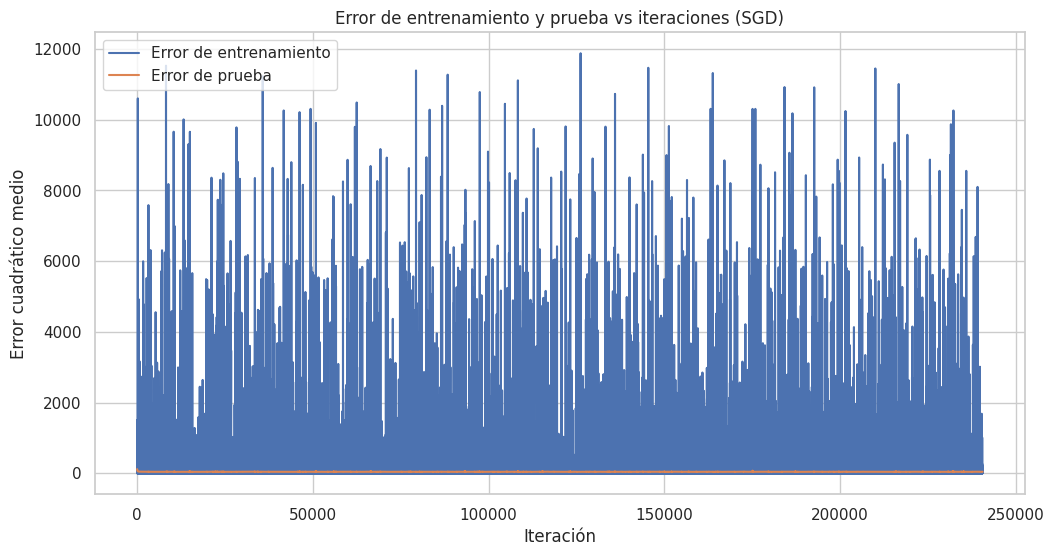

array([[ 2.06081347],
       [-1.02908268],
       [ 1.62814055],
       [ 0.48383818],
       [-0.01277881],
       [-1.38524709],
       [ 1.11250524],
       [-0.28930629],
       [ 0.61027232],
       [ 1.42873984],
       [-0.40208996],
       [-0.36185103],
       [-0.02094145],
       [-0.05927295],
       [ 0.8729197 ],
       [ 0.29443812],
       [-0.122325  ],
       [-0.19434691],
       [-0.19535613],
       [ 0.17947732],
       [ 0.43589349],
       [-0.61684498],
       [ 0.1592318 ],
       [-0.1231718 ]])

In [ ]:
stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.001, epochs=20)


### Gradiente Descendiente con Mini-Batches

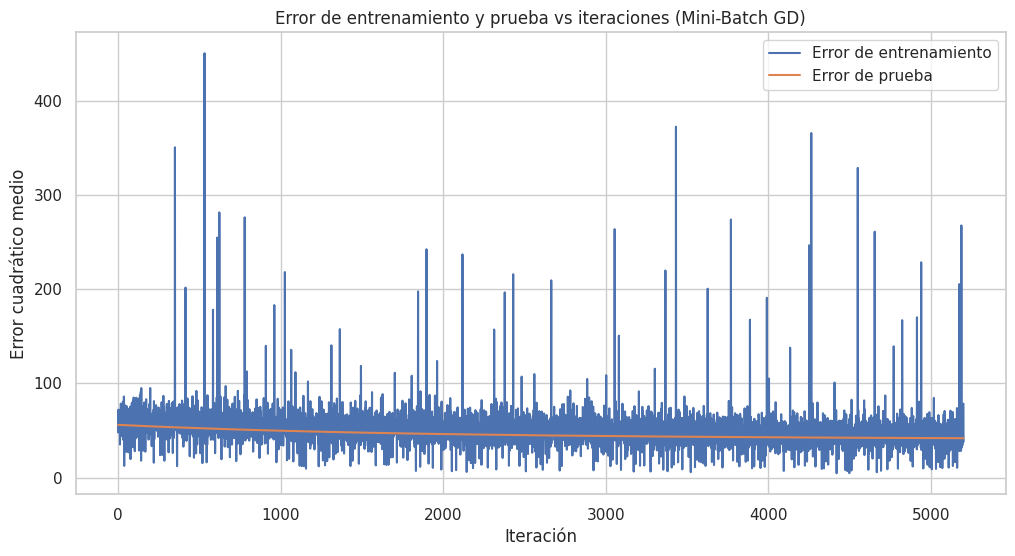

array([[ 1.64027406],
       [-0.31555299],
       [ 0.71411621],
       [ 1.80364099],
       [ 0.34073532],
       [-0.54823829],
       [ 1.15812507],
       [-1.17121066],
       [ 1.19282872],
       [-0.10543628],
       [-0.27888478],
       [ 0.37860381],
       [ 0.70447669],
       [ 0.22564344],
       [ 1.59371085],
       [ 0.5939316 ],
       [-0.45482645],
       [ 0.34488849],
       [ 0.29798014],
       [-0.47083166],
       [-0.36765329],
       [ 0.3463251 ],
       [-0.24485596],
       [ 0.52938859]])

In [ ]:
mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.0001, epochs=400, batch_size = 1000)